Summary of Daily Returns:
count    3.759800e+04
mean              inf
std               NaN
min     -1.000000e+02
25%     -9.463806e+01
50%     -8.654930e-02
75%      1.774315e+03
max               inf
Name: Daily_Return, dtype: float64


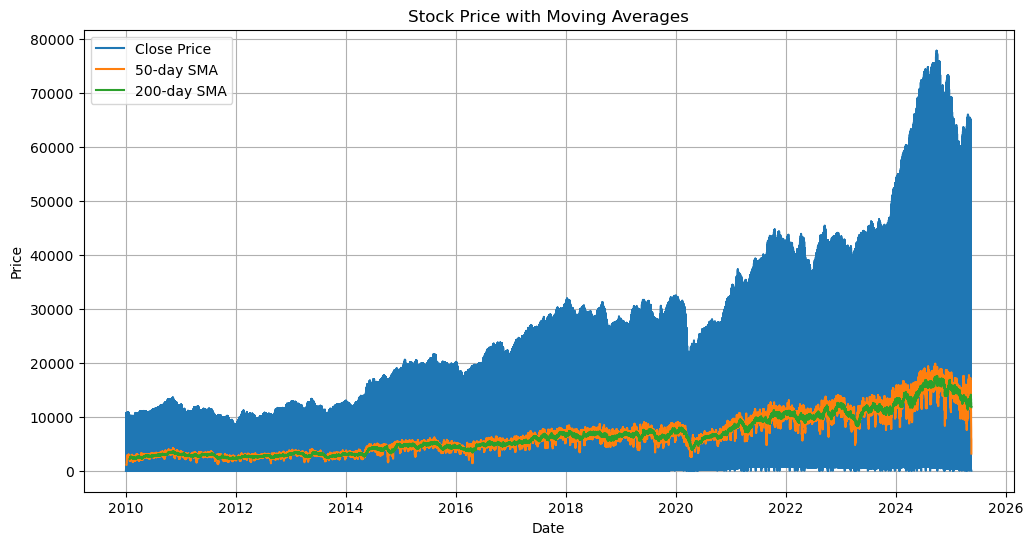

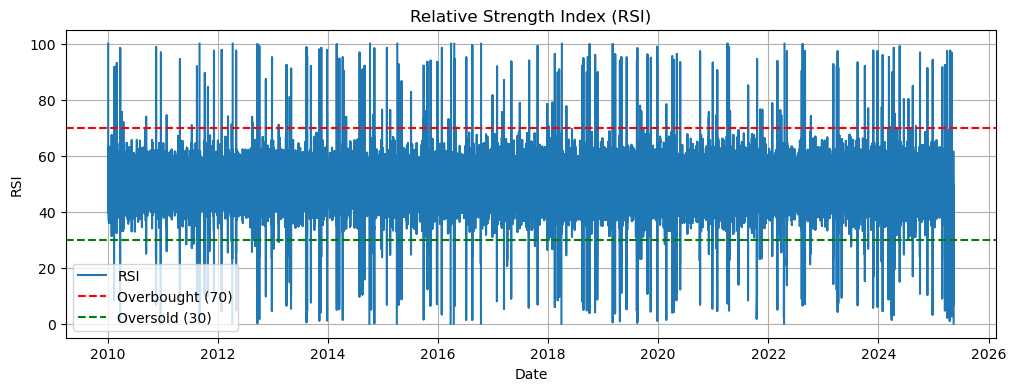

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load stock data from Excel
def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    return df

# Function to calculate daily returns in percentage
def calculate_daily_returns(df):
    df['Daily_Return'] = df['Close'].pct_change() * 100
    return df

# Function to calculate Simple Moving Average (SMA)
def calculate_sma(df, window):
    sma_label = f'SMA_{window}'
    df[sma_label] = df['Close'].rolling(window=window).mean()
    return df

# Function to calculate RSI (Relative Strength Index)
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

# Function to plot closing price and SMAs
def plot_price_and_sma(df):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['SMA_50'], label='50-day SMA')
    plt.plot(df['Date'], df['SMA_200'], label='200-day SMA')
    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot RSI
def plot_rsi(df):
    plt.figure(figsize=(12,4))
    plt.plot(df['Date'], df['RSI'], label='RSI')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to run analysis
def run_analysis(file_path, sheet_name):
    df = load_data(file_path, sheet_name)
    df = calculate_daily_returns(df)
    df = calculate_sma(df, 50)
    df = calculate_sma(df, 200)
    df = calculate_rsi(df)

    print("Summary of Daily Returns:")
    print(df['Daily_Return'].describe())

    plot_price_and_sma(df)
    plot_rsi(df)

    # Save the processed data if needed
    df.to_csv('processed_stock_data.csv', index=False)

# Example usage
if __name__ == "__main__":
    run_analysis('Historical_Data_v2.xlsx', 'Historical_Data_Values')


In [ ]:
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
  <title>Stock Analysis Dashboard</title>
  <link rel="stylesheet" href="{% static 'css/analysis_styles.css' %}" />
</head>
<body>

  <div class="container">

    <!-- LEFT SIDE -->
    <div id="left-panel">
      <!-- Date Selection Table -->
      <form method="post" id="stock-analysis-form">
        {% csrf_token %}
        <table id="date-table">
          <thead>
            <tr>
              <th>Start Date</th>
              <th>End Date</th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <td><input type="date" id="start-date" name="start_date" value="{{ start_date }}" /></td>
              <td><input type="date" id="end-date" name="end_date" value="{{ end_date }}" /></td>
            </tr>
          </tbody>
        </table>

        <!-- CMP, Days to Expiry, ATM+10% -->
        <div id="stock-section">
          <table id="stock-info-table">
            <tr>
              <th>Stock Code:</th>
              <td><input type="text" id="stock-code" name="stock_code" placeholder="e.g., RELIANCE" value="{{ stock_code }}" /></td>
              <th>Start Date:</th>
              <td><span id="start-date-display">{{ start_date_display }}</span></td>
            </tr>
            <tr>
              <th>CMP:</th>
              <td><span id="cmp">{{ cmp }}</span></td>
              <th>End Date:</th>
              <td><span id="expiry-date">{{ expiry_date_display }}</span></td>
            </tr>
            <tr>
              <th>ATM + 10%:</th>
              <td><span id="atm-plus-10">{{ atm_plus_10 }}</span></td>
              <th>Days to Expiry:</th>
              <td><span id="days-to-expiry">{{ days_to_expiry }}</span></td>
            </tr>
          </table>
          <div class="button-row">
            <button type="submit" id="analyze-btn">Analyze</button>
          </div>
        </div>
      </form>

      <!-- Data Display Box -->
      <div id="data-display">
        <h3>Last Month's performance for same time period: </h3>
        <div id="dynamic-data">
          {% if days_to_expiry and percent_move %}
          <p>Last month for <strong>{{ days_to_expiry }} days to expiry</strong> there was a move of <strong>{{ percent_move }}%</strong></p>{% endif %}
        </div>
      </div>
    </div>

    <!-- RIGHT SIDE -->
    <div id="right-panel">
      <h3>Monthly Analysis</h3>
      <div class="analyze-months">
        Analyzing past 
         <input type="number" id="analysis-months" name="analysis_months" min="12" value="{{ analysis_months }}" readonly style="background-color: #e9ecef;" /> months
      </div>

      <table id="monthly-table">
  <thead>
    <tr>
      <th>Threshold</th>
      <th>Months Crossed</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Less than 5%</td>
      <td id="crossed-0-5">{{ crossed_0_5 }}</td>
    </tr>
    <tr>
      <td>5% to 10%</td>
      <td id="crossed-5-10">{{ crossed_5_10 }}</td>
    </tr>
    <tr>
      <td>10% to 15%</td>
      <td id="crossed-10-15">{{ crossed_10_15 }}</td>
    </tr>
    <tr>
      <td>15% to 20%</td>
      <td id="crossed-15-20">{{ crossed_15_20 }}</td>
    </tr>
    <tr>
      <td>20% to 25%</td>
      <td id="crossed-20-25">{{ crossed_20_25 }}</td>
    </tr>
    <tr>
      <td>More than 25%</td>
      <td id="crossed-25">{{ crossed_25 }}</td>
    </tr>
    <tr>
      <td><strong>Max % Crossed</strong></td>
      <td id="max-crossed">{{ max_crossed }}</td>
    </tr>
  </tbody>
</table>
     <table id="monthly-table-negative">
  <thead>
    <tr>
      <th>Negative Threshold</th>
      <th>Months Crossed</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>More than -25%</td>
      <td id="neg-crossed-25">{{ neg_crossed_25 }}</td>
    </tr>
    <tr>
      <td>-20% to -25%</td>
      <td id="neg-crossed-20-25">{{ neg_crossed_20_25 }}</td>
    </tr>
    <tr>
      <td>-15% to -20%</td>
      <td id="neg-crossed-15-20">{{ neg_crossed_15_20 }}</td>
    </tr>
    <tr>
      <td>-10% to -15%</td>
      <td id="neg-crossed-10-15">{{ neg_crossed_10_15 }}</td>
    </tr>
    <tr>
      <td>-5% to -10%</td>
      <td id="neg-crossed-5-10">{{ neg_crossed_5_10 }}</td>
    </tr>
    <tr>
      <td>Less than -5%</td>
      <td id="neg-crossed-0-5">{{ neg_crossed_0_5 }}</td>
    </tr>
    <tr>
      <td><strong>Min % Crossed</strong></td>
      <td id="min-crossed">{{ min_crossed }}</td>
    </tr>
  </tbody>
</table>

    </div>

  </div>

  <!-- Set default start/end dates -->
  {% if not start_date or not end_date %}
  <script>
    const today = new Date();
    const yesterday = new Date(today);
    yesterday.setDate(yesterday.getDate() - 1);
    const start = new Date(yesterday);
    start.setFullYear(start.getFullYear() - 1);

    document.getElementById("start-date").valueAsDate = start;
    document.getElementById("end-date").valueAsDate = yesterday;
  </script>
  {% endif %}

</body>
</html>


In [ ]:
def get_percentage_move_to_expiry(stock_code):
    today = date.today()

    with connection.cursor() as cursor:
        # Get next expiry after today
        cursor.execute("""
            SELECT DISTINCT expiry 
            FROM api_daily_stock_data 
            WHERE stock_code = %s AND expiry > %s 
            ORDER BY expiry ASC 
            LIMIT 1
        """, [stock_code, today])
        next_expiry_row = cursor.fetchone()

    if not next_expiry_row:
        return None, None, None, None

    next_expiry = next_expiry_row[0]
    diff_days = (next_expiry - today).days
    pseudo_date = today - timedelta(days=diff_days)

    with connection.cursor() as cursor:
        # Closest date before or equal to pseudo_date
        cursor.execute("""
            SELECT date, close 
            FROM api_daily_stock_data 
            WHERE stock_code = %s AND date <= %s 
            ORDER BY date DESC 
            LIMIT 1
        """, [stock_code, pseudo_date])
        pseudo_row = cursor.fetchone()

    if not pseudo_row:
        return None, None, None, None

    actual_pseudo_date, pseudo_close = pseudo_row

    with connection.cursor() as cursor:
        # Closest date before or equal to expiry
        cursor.execute("""
            SELECT date, close 
            FROM api_daily_stock_data 
            WHERE stock_code = %s AND date <= %s 
            ORDER BY date DESC 
            LIMIT 1
        """, [stock_code, next_expiry])
        expiry_row = cursor.fetchone()

    if not expiry_row:
        return None, None, None, None

    actual_expiry_date, expiry_close = expiry_row

    if pseudo_close == 0:
        return actual_pseudo_date, actual_expiry_date, None, diff_days

    pct_move = ((expiry_close - pseudo_close) / pseudo_close) * 100
    return actual_pseudo_date, actual_expiry_date, round(pct_move, 2), diff_days


@csrf_exempt
def analysis_view(request):
    start_date_str = request.POST.get('start_date')
    end_date_str = request.POST.get('end_date')
    stock_code = request.POST.get('stock_code', '').upper()
    analysis_months = int(request.POST.get('analysis_months', '12'))

    if not start_date_str or not end_date_str:
        today = datetime.today().date()
        end_date = today
        start_date = end_date.replace(year=end_date.year - 1)
    else:
        start_date = datetime.strptime(start_date_str, "%Y-%m-%d").date()
        end_date = datetime.strptime(end_date_str, "%Y-%m-%d").date()

    crossed_0_5 = crossed_5_10 = crossed_10_15 = crossed_15_20 = crossed_20_25 = crossed_25 = 0
    neg_crossed_25 = neg_crossed_20_25 = neg_crossed_15_20 = neg_crossed_10_15 = neg_crossed_5_10 = neg_crossed_0_5 = 0
    max_crossed = min_crossed = 0

    pseudo_date = expiry_date = percent_move = holding_days = None

    if stock_code and start_date and end_date:
        with connection.cursor() as cursor:
            cursor.execute(
                """
                SELECT date, close 
                FROM api_daily_stock_data 
                WHERE stock_code = %s 
                  AND date BETWEEN %s AND %s
                ORDER BY date ASC
                """,
                [stock_code, start_date, end_date]
            )
            rows = cursor.fetchall()

            if rows:
                monthly_prices = {}
                for date_obj, close_price in rows:
                    month_key = date_obj.strftime("%Y-%m")
                    if month_key not in monthly_prices:
                        monthly_prices[month_key] = {'first': close_price, 'last': close_price}
                    else:
                        monthly_prices[month_key]['last'] = close_price

                def month_key_to_date(month_key):
                    return datetime.strptime(month_key + "-01", "%Y-%m-%d").date()

                filtered_months = [m for m in monthly_prices.keys() if start_date <= month_key_to_date(m) <= end_date]
                sorted_months = sorted(filtered_months)
                analysis_months = len(sorted_months)

                percent_moves = []
                for month in sorted_months:
                    first_close = monthly_prices[month]['first']
                    last_close = monthly_prices[month]['last']
                    pct_move = ((last_close - first_close) / first_close) * 100
                    percent_moves.append(pct_move)

                for pct in percent_moves:
                    if pct >= 25:
                        crossed_25 += 1
                    elif 20 <= pct < 25:
                        crossed_20_25 += 1
                    elif 15 <= pct < 20:
                        crossed_15_20 += 1
                    elif 10 <= pct < 15:
                        crossed_10_15 += 1
                    elif 5 <= pct < 10:
                        crossed_5_10 += 1
                    elif 0 <= pct < 5:
                        crossed_0_5 += 1
                    elif -5 < pct < 0:
                        neg_crossed_0_5 += 1
                    elif -10 < pct <= -5:
                        neg_crossed_5_10 += 1
                    elif -15 < pct <= -10:
                        neg_crossed_10_15 += 1
                    elif -20 < pct <= -15:
                        neg_crossed_15_20 += 1
                    elif -25 < pct <= -20:
                        neg_crossed_20_25 += 1
                    else:  # pct <= -25
                        neg_crossed_25 += 1

                max_crossed = max(percent_moves) if percent_moves else 0
                min_crossed = min(percent_moves) if percent_moves else 0

                # New logic: pseudo-to-expiry percent move
                pseudo_date, expiry_date, percent_move, holding_days = get_percentage_move_to_expiry(stock_code)

    context = {
        'analysis_months': analysis_months,
        'start_date': start_date.strftime("%Y-%m-%d"),
        'end_date': end_date.strftime("%Y-%m-%d"),
        'stock_code': stock_code,
        'crossed_0_5': crossed_0_5,
        'crossed_5_10': crossed_5_10,
        'crossed_10_15': crossed_10_15,
        'crossed_15_20': crossed_15_20,
        'crossed_20_25': crossed_20_25,
        'crossed_25': crossed_25,
        'max_crossed': round(max_crossed, 2),
        'neg_crossed_25': neg_crossed_25,
        'neg_crossed_20_25': neg_crossed_20_25,
        'neg_crossed_15_20': neg_crossed_15_20,
        'neg_crossed_10_15': neg_crossed_10_15,
        'neg_crossed_5_10': neg_crossed_5_10,
        'neg_crossed_0_5': neg_crossed_0_5,
        'min_crossed': round(min_crossed, 2),
        'pseudo_date': pseudo_date,
        'expiry_date': expiry_date,
        'percent_move': percent_move,
        'holding_days': holding_days,
    }
    return render(request, 'analysis.html', context)

In [ ]:
stock_code = stock_info["stock_code"]
        atm_key = "ATM_PER_EQ" if stock_info["stock_type"] == 'equity' else "ATM_PER_IND"
        atm_per = config(atm_key, cast=int, default=5)